In [5]:
import os
import shutil

f = open("togds.txt", 'r')

sdir = 'data'
ddir = 'nyt'

for line in f:
    fields = line.split(',')
    guid = fields[2]
    date = fields[3]
    
    sfn = sdir+'/'+date[6:10]+'/'+date[0:2]+'/'+date[3:5]+'/'+str(guid)+'.xml'
    dfn = ddir+'/'+str(guid)+'.'+'.xml'
    shutil.copy(sfn, dfn)
    #fa = open(fn, 'r')
    #fa.close()
    

f.close()    

In [8]:
f = open("togds.txt", 'r')

ddir = 'nyt'

for line in f:
    fields = line.split(',')
    guid = fields[2]
    date = fields[3]
    
    sfn = 'nyt'+str(guid)+'..xml'
    dfn = ddir+'/'+str(guid)+'.xml'
    if os.path.isfile(sfn):
        shutil.move(sfn, dfn)
    #fa = open(fn, 'r')
    #fa.close()
    

f.close()    

In [23]:
from sets import Set
ftogds = open("togds.test.txt", 'r')
t = Set([])
g = Set([])
o = Set([])

for line in ftogds:
    fields = line.split(',')
    t.add(fields[0])
    o.add(fields[1])
    g.add(fields[2])
ftodgs.close()

tt = {}
gg = {}
oo = {}
   
tl = list(t)
gl = list(g)
ol = list(o)

tl.sort()
gl.sort()
ol.sort()

t = Set(tl)
g = Set(gl)
o = Set(ol)

ftogds = open("togds.test.txt", 'r')

for line in ftogds:
    fields = line.split(',')
    tt[fields[0]] = 0
    oo[fields[1]] = 0
    gg[fields[2]] = 0
ftogds.close()


ftogds = open("togds.test.txt", 'r')

for line in ftogds:
    fields = line.split(',')
    tt[fields[0]] = tt[fields[0]]+1
    oo[fields[1]] = oo[fields[1]]+1
    gg[fields[2]] = gg[fields[2]]+1
ftogds.close()

fout = open('test.t.txt', 'w')
for (k, v) in sorted(tt.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    fout.write(k+','+str(v)+'\n')
fout.close
fout = open('test.g.txt', 'w')
for (k, v) in sorted(gg.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    fout.write(k+','+str(v)+'\n')
fout.close
fout = open('test.o.txt', 'w')
for (k, v) in sorted(oo.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    fout.write(k+','+str(v)+'\n')
fout.close



print len(t), len(o), len(g)
print len(tt), len(oo), len(oo)


241 521 16337
241 521 521


In [42]:
import xml.etree.ElementTree as ET
ftodgs = open("togds.txt", 'r')

ddir = 'nyt'

for line in ftodgs:
    fields = line.split(',')
    org  = fields[1]
    guid = fields[2]
    date = fields[3]
    
    fin = 'nyt'+'/'+str(guid)+'.xml'
    fgh = 'gh'+'/'+str(guid)+'.txt'
    fgl = 'gl'+'/'+str(guid)+'.txt'
    fgc = 'gc'+'/'+str(guid)+'.txt'
    #fgs = 'gss'+'/'+str(guid)+'.txt'
    f = open(fin, 'r')
    gh = open(fgh, 'w')
    gl = open(fgl, 'w')
    gc = open(fgc, 'w')
    #gs = open(fgs, 'w')
    '''
    this is the final step, well, almost, before the merge
    three folders we go:
    1. gh: headline
    2. gl: leadning paragraph
    2. gc: content
    3. gs: sentence
    under each is a file with the same name <guid>.txt
    

    header first
    '''
    tree = ET.parse(fin)

    for headline in tree.getroot().iter('hl1'):
        gh.write(headline.text.encode('utf-8')+'\n')
    
    for block in tree.getroot().iter('block'):
        if block.get('class') == 'lead_paragraph':
            for p in block.iter('p'):
                gl.write(p.text.encode('utf-8'))
        else:
            if block.get('class') == 'full_text':
                for p in block.iter('p'):
                    gc.write(p.text.encode('utf-8'))
                    #if org.strip().lower() in p.text.strip().lower():
                        #gs.write(p.text.encode('utf-8')+'\n')
    f.close()
    gh.close()
    gl.close()
    gc.close()
    #gs.close()
    

ftogds.close()

In [45]:
ftogds = open('togds.txt','r')

to = Set([])

for line in ftogds:
    to.add(line.split(',')[0]+','+line.split(',')[1])
ftogds.close()
tol = list(to)
tol.sort()

fout = open('to.txt', 'w')
for i in tol:
    fout.write(i+'\n')
fout.close()

In [56]:
import xml.etree.ElementTree as ET

import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

fto = open("to.txt", "r")

dto = {}

for line in fto:
    fields = line.split(',')
    dto[fields[0]] = Set([])

fto.close()

fto = open("to.txt", "r")

for line in fto:
    fields = line.split(',')
    oname = fields[1].encode('utf-8').strip().lower()
    if oname.split(' ')[-1][0:2] == 'in' or oname.split(' ')[-1][0:2] == 'co':
        #cut from end to the last ' '
        oname = ' '.join(oname.split(' ')[:-1])
    dto[fields[0]].add(oname)
fto.close()
  
ftodgs = open("togds.txt", 'r')

ddir = 'nyt'

for line in ftodgs:
    fields = line.split(',')
    ticker  = fields[0]
    guid = fields[2]
    
    fin = 'nyt'+'/'+str(guid)+'.xml'
    fgs = 'gt'+'/'+str(guid)+'.txt'
    f = open(fin, 'r')
    gs = open(fgs, 'w')
    '''
    this is the final step, well, almost, before the merge
    three folders we go:
    1. gh: headline
    2. gl: leadning paragraph
    2. gc: content
    3. gs: sentence
    under each is a file with the same name <guid>.txt
    

    header first
    '''
    tree = ET.parse(fin)

    for block in tree.getroot().iter('block'):
        if block.get('class') == 'full_text':
            for p in block.iter('p'):
                done = False
                src = p.text.strip().lower()

                sentences = tokenizer.tokenize(src)
                for sentence in sentences:
                    for o in dto[ticker]:
                        if o.strip().lower() in sentence and not done:
                            gs.write(p.text.encode('utf-8')+'\n')
                            done = True
    f.close()
    gh.close()
    gl.close()
    gc.close()
    #gs.close()
    

ftogds.close()

In [ ]:
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
fp = open("test.txt")
data = fp.read()
print '\n-----\n'.join(tokenizer.tokenize(data))

In [55]:
#import nltk
#nltk.download()
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sdir = "gssss"
ddir = "gt"

for dirName, subdirList, fileList in os.walk(sdir):
    for fn in fileList:
        fi = open(sdir+'/'+fn, "r")
        data = fi.read()
        
        fo = open(ddir+'/'+fn, "w")
    
        data = data.encode('utf-8')
        sentences = tokenizer.tokenize(data)
        
        for sentences = 
        fo.write('\n'.join(tokenizer.tokenize(data)))
        fi.close()
        fo.close()


        
        

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 6: ordinal not in range(128)

In [58]:
ftogds = open("togds.txt", "r")

fbig = open("big.txt",'w')

gs = {}

for line in ftogds:
    fields = line.split(',')
    g = fields[2]
    s = fields[4][:-1]
    gs[g] = s

sdir = "gt"

for dirName, subdirList, fileList in os.walk(sdir):
    for fn in fileList:
        f = open(sdir+'/'+fn)
        for line in f:
            fbig.write(gs[fn[:-4]]+'|'+line)
        f.close()

fbig.close()




    

In [5]:
import os
from sets import Set

s = Set([])

f = open("big.txt")

for i in f:
    s.add(float(i.split('|')[0]))

sl = list(s)
sl.sort()

print sl

[-0.440819423369, -0.428688262986, -0.396814520976, -0.376548140476, -0.375625427204, -0.325334491425, -0.313442531669, -0.304470616512, -0.303640292099, -0.302319395136, -0.301716480797, -0.288233540987, -0.280125514883, -0.26543242251, -0.262038005043, -0.261361192746, -0.258806150541, -0.257729439081, -0.250444393277, -0.249908530211, -0.24633314634, -0.244079973531, -0.243998431751, -0.241832669323, -0.238688386998, -0.228119638303, -0.225474964114, -0.224986110009, -0.224284055896, -0.222826211086, -0.214261873836, -0.212764918449, -0.206894202602, -0.206693733526, -0.204272903112, -0.203091342727, -0.201596933887, -0.201290298556, -0.20065144922, -0.200311623559, -0.200225546311, -0.195479412916, -0.194806300553, -0.192216961679, -0.192101940982, -0.191668419945, -0.191502400163, -0.191471544715, -0.190986638484, -0.189175919033, -0.188063976536, -0.186738176499, -0.18612458038, -0.184870043513, -0.183258662146, -0.183189535207, -0.182798751064, -0.18134767456, -0.179713840487, -

In [10]:
print len(sl)

f.close()
k = 0
f = open("big.txt")
for j in f:
    k=k+1
print k
f.close()

13190
75093


49 -45 -1 1668 13190


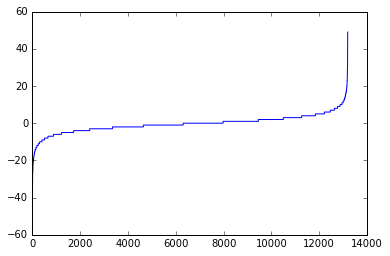

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
sls = [int(x*10000000.0)/100000 for x in sl]
plt.plot(sls)
print max(sls), min(sls), sum(sls)/len(sls), sum([x == 0 for x in sls]), len(sls)